# Посмотрим на обученные модели!

### Посмотрим на фильтры

In [1]:
import torch
import torchvision

import numpy as np

from matplotlib import pyplot as plt
from skimage import io, img_as_float, transform

In [2]:
# На VGG смотреть интереснее всего
model = torchvision.models.vgg16_bn(pretrained=True)
model = model.eval()
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

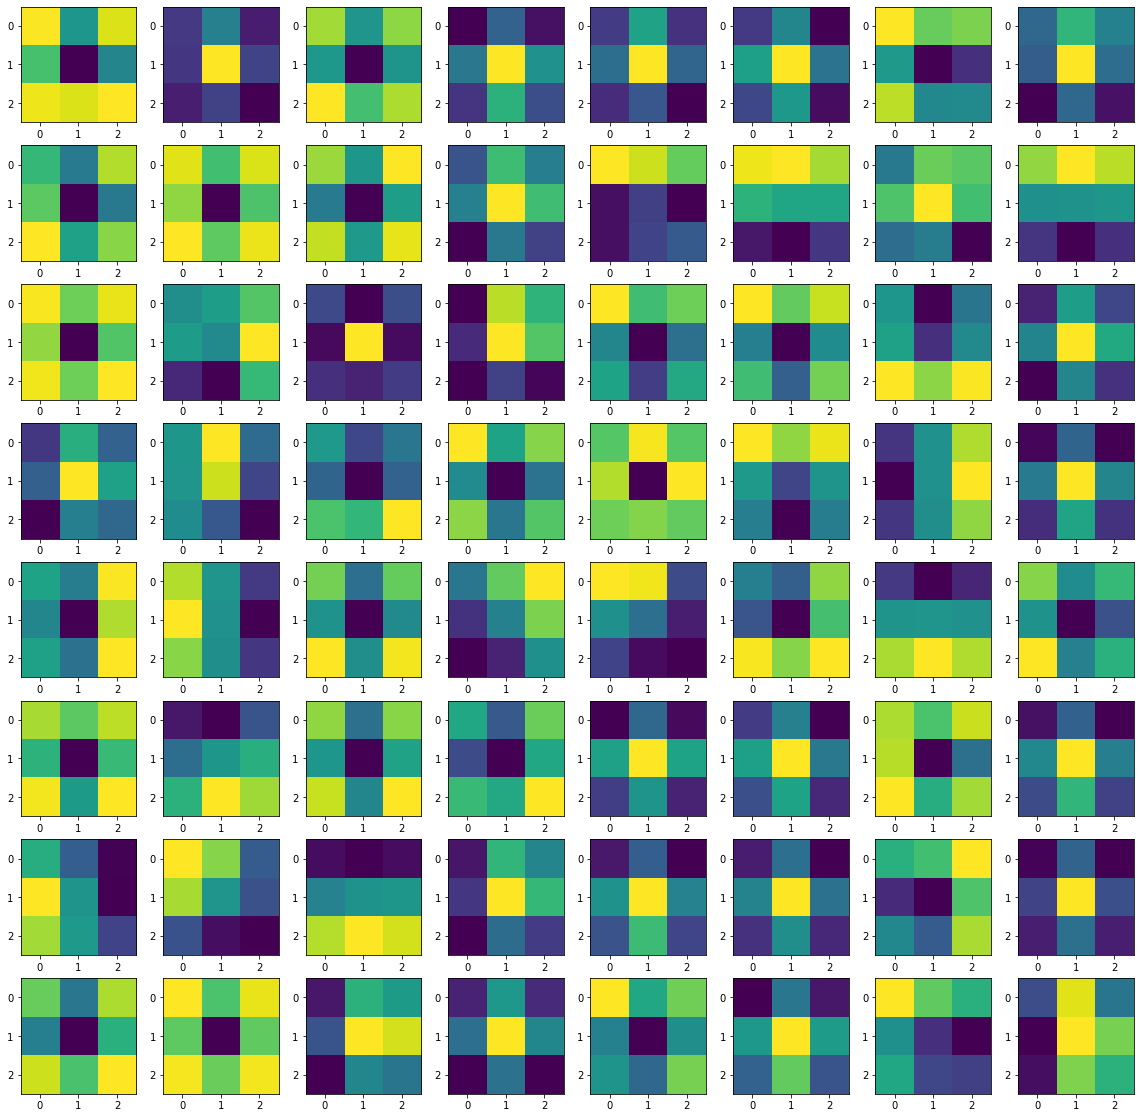

In [3]:
# Смотрим на выученные фильтры
fig, axis = plt.subplots(8, 8, figsize=[20, 20])

for i in range(8):
    for j in range(8):
        axis[i, j].imshow(model.features[0].weight[i * 8 + j, 0].detach().numpy())

### Посмотрим на активации

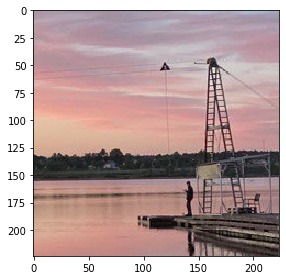

In [4]:

img = io.imread('./media/image1.jpg')
img = img_as_float(img)

img_slice = img[500:724, 600:824] # 224x224

io.imshow(img_slice)

In [5]:
image_tensor = torch.tensor(
    img_slice.transpose([2, 0, 1])[None, ...]
).float()

In [6]:
image_tensor.shape

torch.Size([1, 3, 224, 224])

In [7]:
image_tensor -= torch.tensor((0.485, 0.456, 0.406))[None, :, None, None]
image_tensor /= torch.tensor((0.229, 0.224, 0.225))[None, :, None, None]

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

image_tensor = image_tensor.to(device)
model = model.to(device)

In [9]:
output = model(image_tensor)
output

tensor([[-3.0766e-01, -1.0616e+00,  3.8997e-01, -1.1594e+00, -5.3247e-01,
         -7.9847e-01, -8.3326e-01,  2.9410e-04, -5.6562e-01,  1.3613e+00,
         -1.8347e+00, -1.8848e+00,  8.7965e-01, -2.2621e+00, -6.5886e-01,
         -5.4251e-01, -1.8697e+00, -1.9304e+00, -4.1280e-01, -2.1166e+00,
          3.0504e-01,  8.1034e-01,  7.7868e-01,  1.5224e+00, -1.0904e+00,
         -1.2895e+00,  9.8530e-02, -8.1529e-01, -1.4503e+00, -2.4522e+00,
         -7.4822e-01, -3.0432e+00, -8.3432e-01, -6.0662e-01, -3.0087e-01,
          2.1155e-01,  9.0815e-01, -2.3767e+00, -1.8733e+00, -7.0056e-01,
         -2.2848e+00, -1.7744e+00, -6.0002e-01, -9.5730e-01, -7.7126e-01,
         -1.6409e+00, -2.4293e+00, -1.1583e+00, -2.6358e+00,  1.7382e+00,
          2.2841e+00, -1.2326e+00, -2.7873e+00, -1.3813e+00, -1.4038e+00,
         -2.8903e+00, -2.8952e+00, -6.3175e-01,  1.4598e+00, -2.0227e+00,
         -1.0495e+00, -2.0809e+00, -1.2144e+00, -1.1531e+00, -9.3615e-01,
          5.1443e-01, -2.1711e+00,  4.

In [10]:
class ForwardHooks:
    def __init__(self):
        self.activation_dict = {}
    
    def get_hook(self, name):
        def hook(model, input, output):
            nonlocal self
            self.activation_dict[name] = output
        return hook
    
    

In [11]:
hooks = ForwardHooks()
for name, module in model.named_modules():
    module.register_forward_hook(hooks.get_hook(name))

In [12]:
output = model(image_tensor)

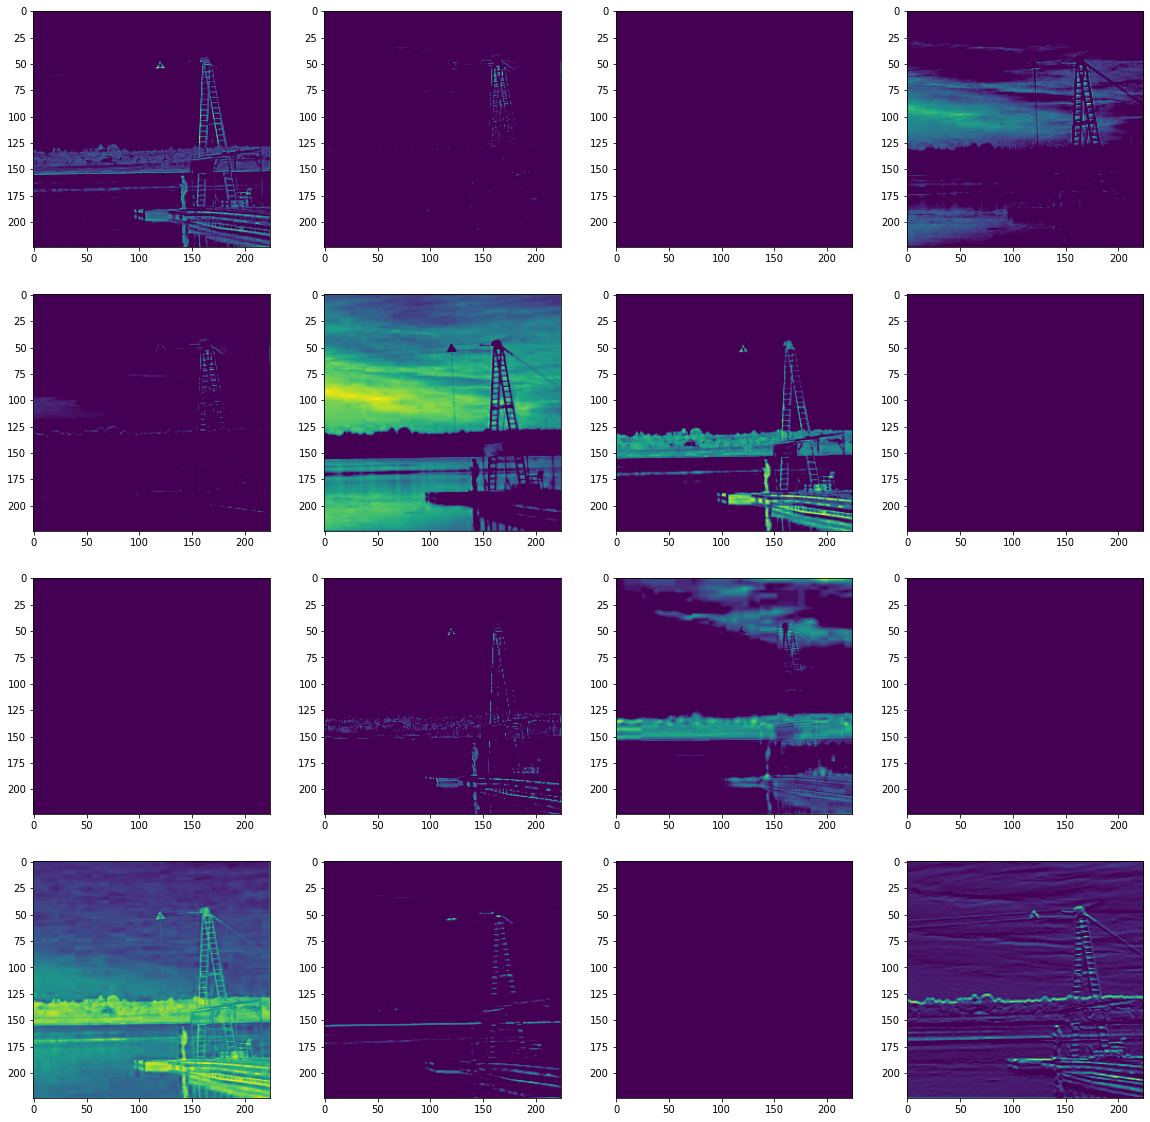

In [13]:
acitivations = hooks.activation_dict['features.2'].detach().cpu().numpy()
acitivations = acitivations[0]
fig, axis = plt.subplots(4, 4, figsize=[20, 20])
for i in range(min(acitivations.shape[0], 16)): # по каналам бежим
    axis[i//4, i%4].imshow(acitivations[i])

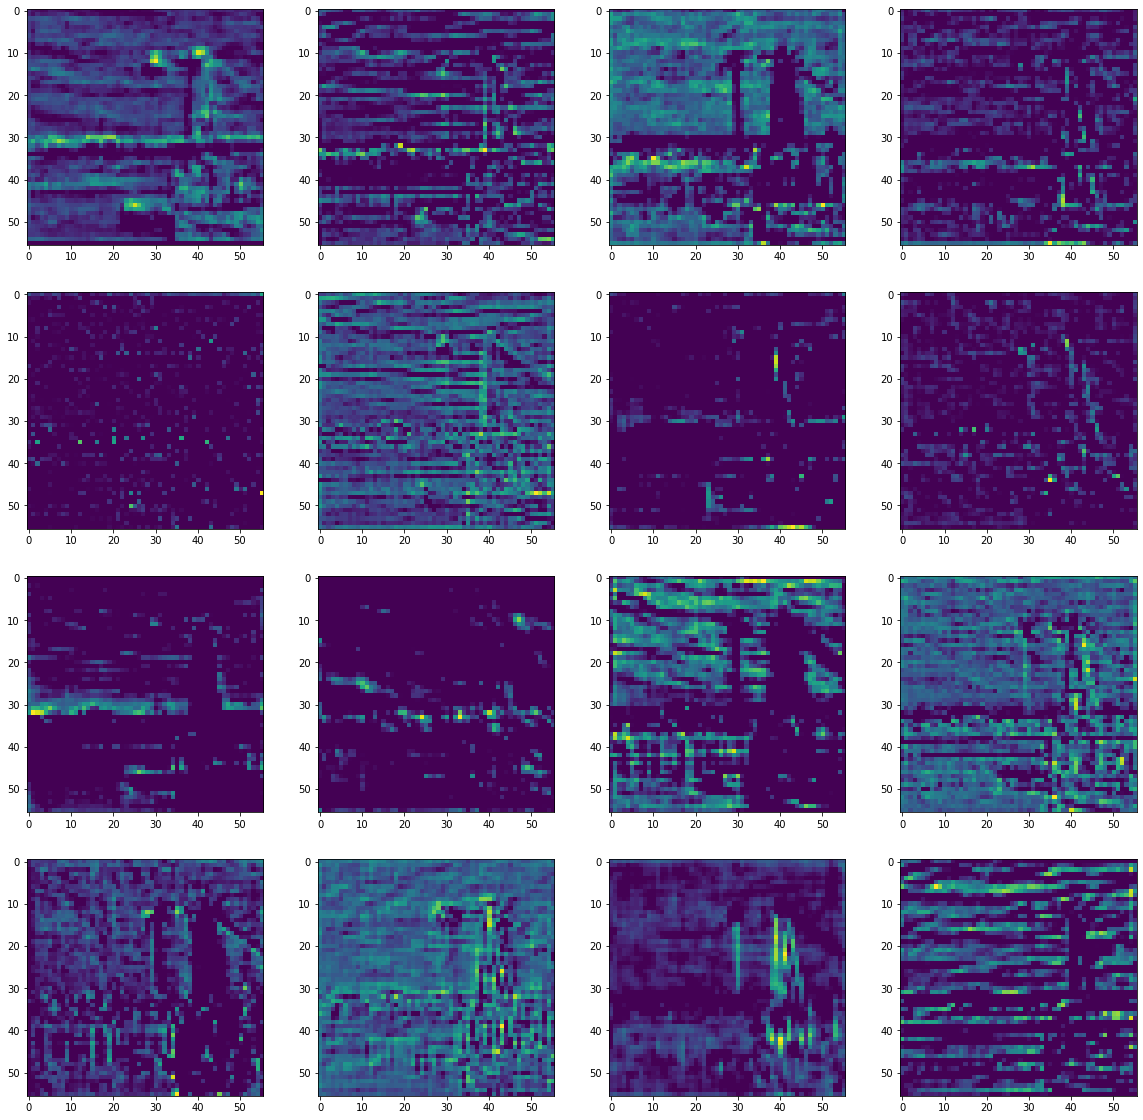

In [14]:
acitivations = hooks.activation_dict['features.16'].detach().cpu().numpy()
acitivations = acitivations[0]
fig, axis = plt.subplots(4, 4, figsize=[20, 20])
for i in range(min(acitivations.shape[0], 16)): # по каналам бежим
    axis[i//4, i%4].imshow(acitivations[i])

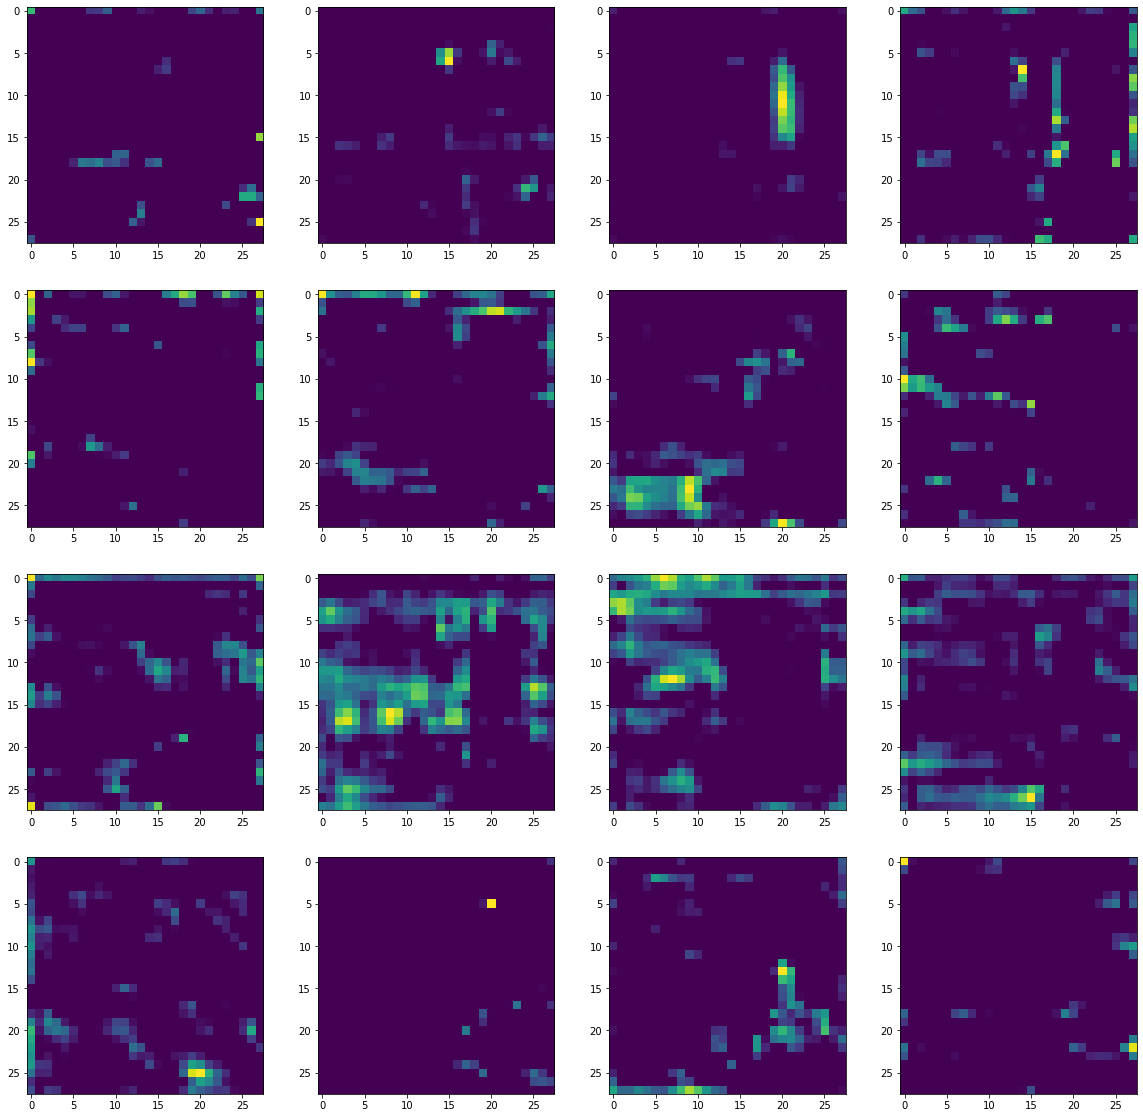

In [15]:
acitivations = hooks.activation_dict['features.32'].detach().cpu().numpy()
acitivations = acitivations[0]
fig, axis = plt.subplots(4, 4, figsize=[20, 20])
for i in range(min(acitivations.shape[0], 16)): # по каналам бежим
    axis[i//4, i%4].imshow(acitivations[i])

### Попробуем найти интерпретацию признаков

Будем подбирать вход, так чтобы сделать признаки наиболее активными

In [16]:
from tqdm import tqdm_notebook
from copy import deepcopy

In [17]:
for param in model.parameters():
    param.requires_grad = False

In [18]:
def post_process_image(img):
    img = img.transpose(1, 2, 0)
    img  *= np.array([0.229, 0.224, 0.225])[None, None]
    img  += np.array([0.485, 0.456, 0.406])[None, None]
    img = np.clip(img, 0, 1)
    return img

In [19]:
target_example = deepcopy(image_tensor)
target_example = torch.nn.Parameter(target_example)

optimizer = torch.optim.SGD([target_example], lr=1e1)

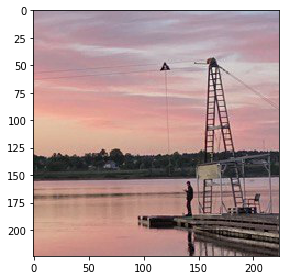

In [20]:
io.imshow(post_process_image(image_tensor.detach().cpu().numpy()[0]))

In [21]:
def dream(image_tensor, feature_name, indexes, lr=12):
    target_example = deepcopy(image_tensor)
    target_example = torch.nn.Parameter(target_example) 
    optimizer = torch.optim.SGD([target_example], lr=lr)
    
    for iteration in tqdm_notebook(range(300 * 5)):
        def closure():
            optimizer.zero_grad()
            output = model(target_example)
            activation = hooks.activation_dict[feature_name]
            for index in indexes:
                activation = activation[index]
            loss = -(activation).mean() # можно на l2 заменить. Но тогда лучше после ReLu брать признак
            loss.backward()

            return loss

        optimizer.step(closure)
        if iteration % 300 == 0:
            io.imshow(post_process_image(target_example.detach().cpu().numpy()[0]))
            io.show()

/tmp/ipykernel_6923/2677027985.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for iteration in tqdm_notebook(range(300 * 5)):


  0%|          | 0/1500 [00:00<?, ?it/s]

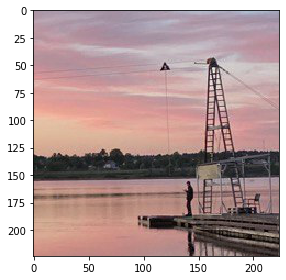

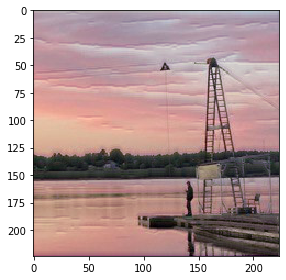

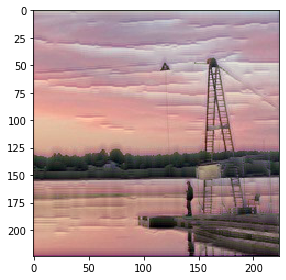

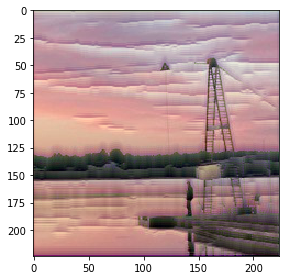

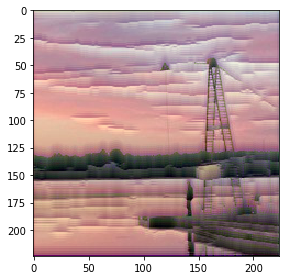

In [22]:
dream(image_tensor,
      'features.3',
      indexes=[0, 5],
      lr=100
     )

/tmp/ipykernel_6923/2677027985.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for iteration in tqdm_notebook(range(300 * 5)):


  0%|          | 0/1500 [00:00<?, ?it/s]

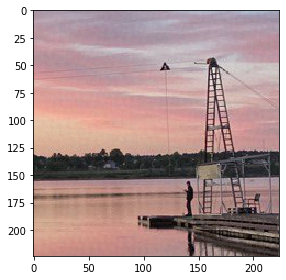

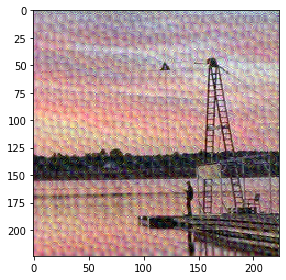

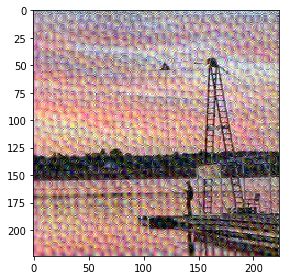

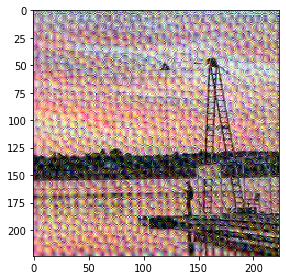

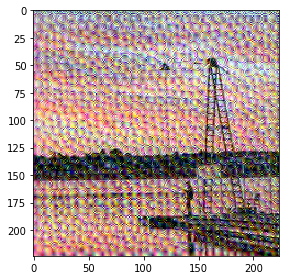

In [23]:
dream(image_tensor,
      'features.17',
      indexes=[0, 0],
      lr=100
     )

/tmp/ipykernel_6923/2677027985.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for iteration in tqdm_notebook(range(300 * 5)):


  0%|          | 0/1500 [00:00<?, ?it/s]

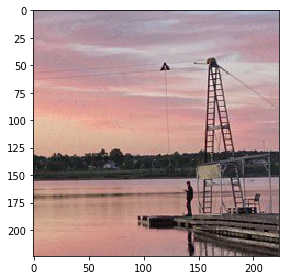

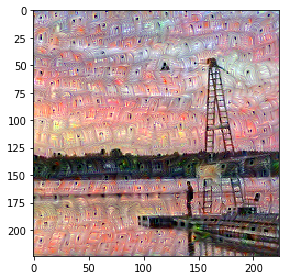

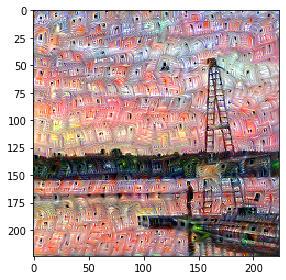

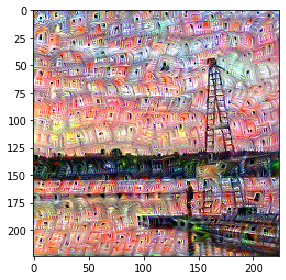

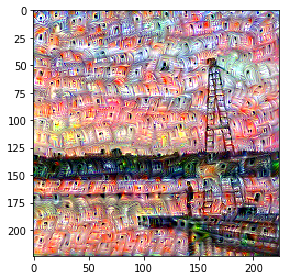

In [24]:
dream(image_tensor,
      'features.30',
      indexes=[0, 0],
      lr=100
     )

/tmp/ipykernel_6923/2677027985.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for iteration in tqdm_notebook(range(300 * 5)):


  0%|          | 0/1500 [00:00<?, ?it/s]

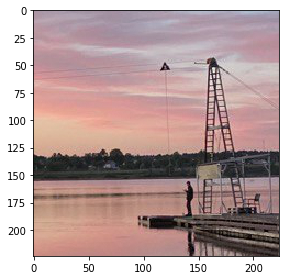

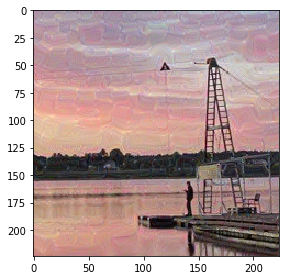

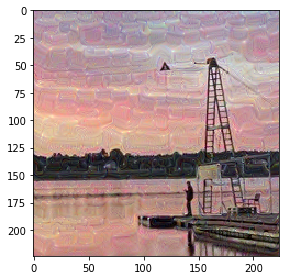

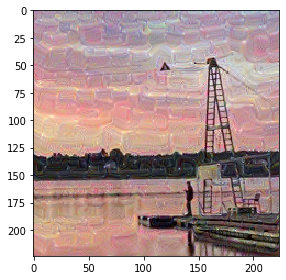

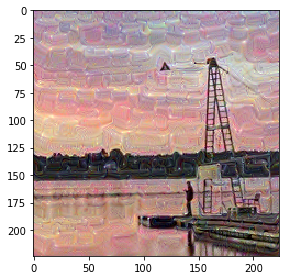

In [25]:
dream(image_tensor,
      'features.30',
      indexes=[0, 7]
     )

/tmp/ipykernel_6923/2677027985.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for iteration in tqdm_notebook(range(300 * 5)):


  0%|          | 0/1500 [00:00<?, ?it/s]

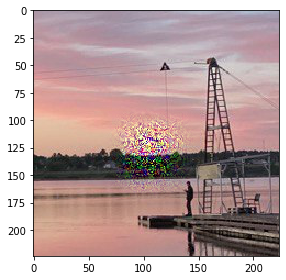

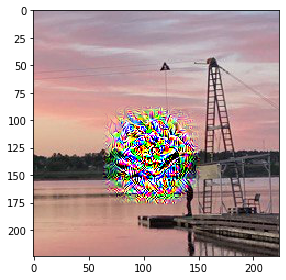

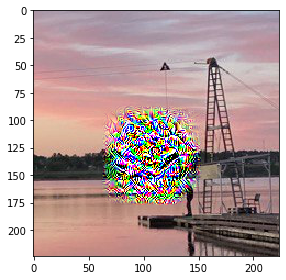

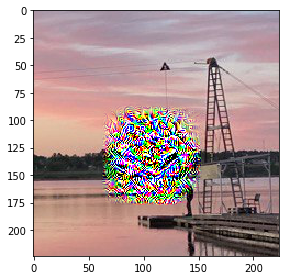

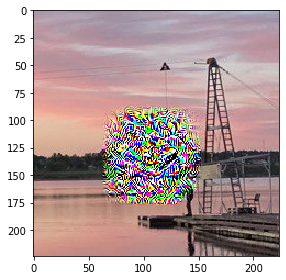

In [26]:
dream(image_tensor,
      'features.30',
      indexes=[0, 7, 16, 13],
      lr=1e2
     )

/tmp/ipykernel_6923/2677027985.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for iteration in tqdm_notebook(range(300 * 5)):


  0%|          | 0/1500 [00:00<?, ?it/s]

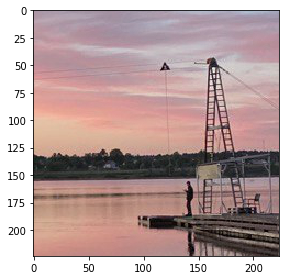

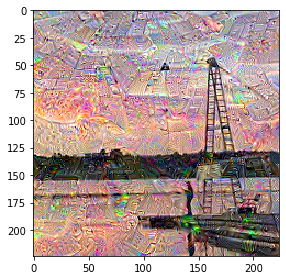

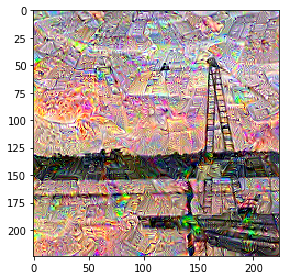

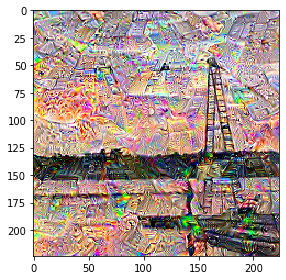

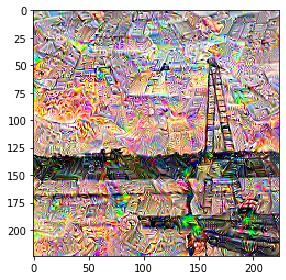

In [27]:
dream(image_tensor,
      'features.42',
      indexes=[0, 1],
      lr=10
     )